# Load Model

In [7]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, balanced_accuracy_score

✅ Predictions saved to 'predictions_with_results.csv'
✅ Model Accuracy: 0.8794
✅ Balanced Accuracy: 0.7106

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94     36403
           1       0.91      0.75      0.82      1846
           2       0.86      0.71      0.78      2511
           3       0.83      0.63      0.72      3626
           4       0.84      0.46      0.60      6176

    accuracy                           0.88     50562
   macro avg       0.87      0.71      0.77     50562
weighted avg       0.88      0.88      0.87     50562



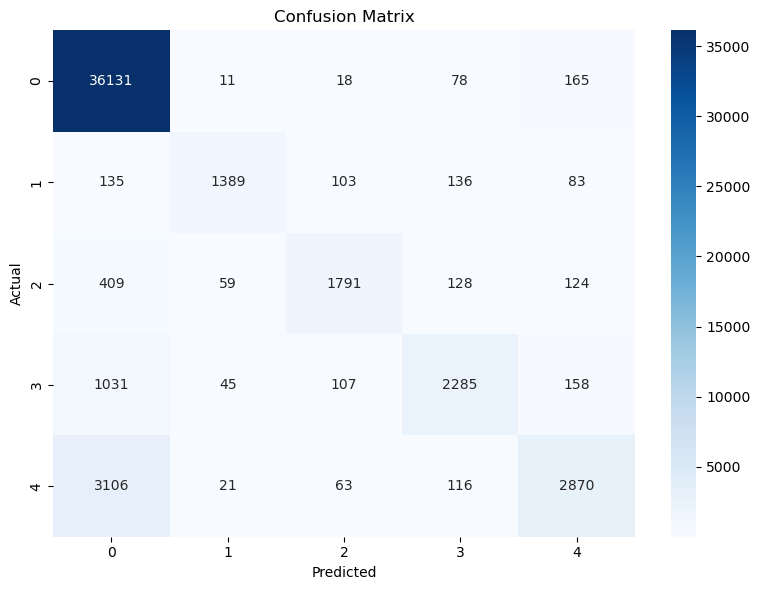

✅ Confusion Matrix saved as 'confusion_matrix.png'

🔹 Class Distribution Comparison saved as class_distribution.png:
   Actual (%)  Predicted (%)
0   71.996756      80.716744
3    7.171394       5.425023
4   12.214707       6.724418
2    4.966180       4.117717
1    3.650963       3.016099


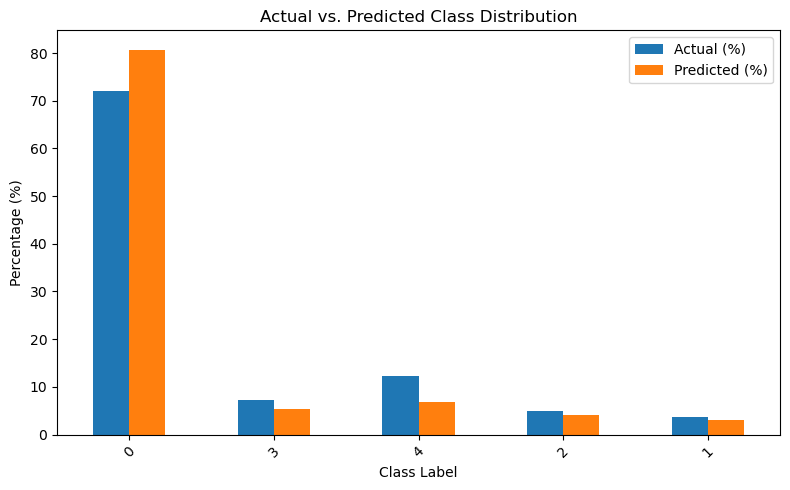

In [8]:
# Load the trained model and top 30 features
rf_model = joblib.load("random_forest_top30.pkl")
top_30_features = joblib.load("top_30_features.pkl")

# Load new dataset
df_new = pd.read_csv("data_before_forest.csv")  # Replace with your dataset

# Ensure all required columns exist in the new data
missing_features = set(top_30_features) - set(df_new.columns)
if missing_features:
    raise ValueError(f"Missing features in new data: {missing_features}")

# Select the same top 30 features used for training
X_new = df_new[top_30_features]

# Predict with the loaded model
predictions = rf_model.predict(X_new)

# Add predictions to the dataset
df_new["Predicted_Owners"] = predictions

# Save predictions to a CSV file
df_new.to_csv("predictions_with_results.csv", index=False)
print("✅ Predictions saved to 'predictions_with_results.csv'")

# ======= Model Evaluation =======
# Check if 'owners' (actual category) is available in the new dataset
if "owners" in df_new.columns:
    # Convert actual labels to numerical if needed
    df_new["owners"] = df_new["owners"].astype("category").cat.codes

    # Compare accuracy
    actual_y = df_new["owners"]
    predicted_y = df_new["Predicted_Owners"]

    accuracy = accuracy_score(actual_y, predicted_y)
    balanced_acc = balanced_accuracy_score(actual_y, predicted_y)
    print(f"✅ Model Accuracy: {accuracy:.4f}")
    print(f"✅ Balanced Accuracy: {balanced_acc:.4f}")

    # Classification Report
    report = classification_report(actual_y, predicted_y)
    print("\n🔹 Classification Report:\n", report)

    # Confusion Matrix
    conf_matrix = confusion_matrix(actual_y, predicted_y)
    plt.figure(figsize=(8,6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(actual_y), yticklabels=np.unique(actual_y))
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.tight_layout()
    plt.savefig("confusion_matrix.png", dpi=300)
    plt.show()
    print("✅ Confusion Matrix saved as 'confusion_matrix.png'")

    # ======= Compare Class Distribution =======
    def compare_class_distributions(y_actual, y_pred, filename):
        # Count actual and predicted class occurrences
        actual_counts = Counter(y_actual)
        predicted_counts = Counter(y_pred)

        # Convert to percentages
        actual_ratios = {k: v / len(y_actual) * 100 for k, v in actual_counts.items()}
        predicted_ratios = {k: v / len(y_pred) * 100 for k, v in predicted_counts.items()}

        # Convert to DataFrame
        class_distribution_df = pd.DataFrame({
            "Actual (%)": actual_ratios,
            "Predicted (%)": predicted_ratios
        }).fillna(0)

        print(f"\n🔹 Class Distribution Comparison saved as {filename}:")
        print(class_distribution_df)

        # Plot class distribution
        class_distribution_df.plot(kind="bar", figsize=(8, 5), title="Actual vs. Predicted Class Distribution")
        plt.ylabel("Percentage (%)")
        plt.xlabel("Class Label")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig(filename, dpi=300)
        plt.show()

    compare_class_distributions(actual_y, predicted_y, "class_distribution.png")

else:
    print("⚠️ Warning: No actual 'owners' values found in new_data.csv, skipping evaluation.")


In [ ]:
X_new[,""]

,median_forever,r_price,Achievements,Language_N,Steam.Trading.Cards,Platform_N,Adventure,Action,Simulation,Casual,...,Family.Sharing,Multi.player,Early.Access,Stats,Remote.Play.on.TV,Co.op,Sports,Steam.Workshop,Racing,Includes.level.editor
0,0,0.00000,17,2,0,1,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
1,0,0.00000,17,10,0,3,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0,0.00000,0,1,0,1,0,1,0,1,...,0,1,1,0,0,0,0,0,0,0
3,0,0.00000,40,1,0,1,1,1,0,1,...,1,0,0,0,0,0,0,0,0,0
4,0,0.00000,0,2,0,1,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50557,0,199.99001,0,1,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
50558,0,199.99001,6,2,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
50559,0,199.99001,0,1,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
50560,0,199.99001,0,1,0,2,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0
